# Geração da Tabela 2 - Ajustada com funções Sklearn

# Treinamentos de Detecção de Anomalias para geração de matriz de confusão com exclusão de extremos

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

tabelafinal = pd.DataFrame(columns=['algoritmo','contaminacao','acuracia','precisao','recall','fn','fp'])
print(tabelafinal)
novatabelafinal = pd.DataFrame(columns=['algoritmo','contaminacao','acuracia','precisao','recall','fn','fp'])
print(tabelafinal)
tabelafinalrecall = pd.DataFrame(columns=['algoritmo','contaminacao','acuracia','precisao','recall','fn','fp'])
print(tabelafinal)
   
def avalia(clf_name,Y,y_train_scores,y_train_pred):
    # Avalia e imprime os resultados
    tn, fp, fn, tp = confusion_matrix(Y,y_train_pred).ravel()
    ac=accuracy_score(Y,y_train_pred)*100
    print('Acurácia='+str(ac))   
    pc=precision_score(Y,y_train_pred)*100
    print('Precisão='+str(pc))
    rc=recall_score(Y,y_train_pred)*100
    print('Recall='+str(rc))
    print('Falso Negativo='+str(fn))
    print('Falso Positivo='+str(fp))

def gera_matriz_de_confusao(Y,y_train_pred,clf_name):
    cm = confusion_matrix(Y,y_train_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal','Anomalia'])
    disp.plot(cmap=plt.cm.Blues)
    disp.ax_.set(title='Matriz de Confusão do '+clf_name,xlabel='Valores preditos', ylabel='Valores reais')
    plt.show()
      
def calcula_anomalias(clf_name,parametros):
    menorfp=len(X)
    melhoracuracia=0
    mcont=0
    contamination=0.01
    while contamination<0.16:
        funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
        clf = eval(funcao)
        clf.fit(X)
        tn, fp, fn, tp = confusion_matrix(Y,clf.labels_).ravel()
        ac=accuracy_score(Y,clf.labels_)
        if fp<menorfp:
           mcont=contamination
           menorfp=fp
           melhoracuracia=ac
        else:
            if fp==menorfp:
                if ac>melhoracuracia:
                   mcont=contamination
                   menorfp=fp
                   melhoracuracia=ac                
        contamination=contamination+0.01
    contamination=mcont
    print("Avaliação do modelo "+clf_name+":")
    print('Contaminação utilizada='+str(contamination))
    return contamination

def calcula_anomalias_acuracia_fp(clf_name,parametros):
    menorfp=len(X)
    melhoracuracia=0
    mcont=0
    contamination=0.01
    while contamination<0.16:
        funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
        clf = eval(funcao)
        clf.fit(X)
        tn, fp, fn, tp = confusion_matrix(Y,clf.labels_).ravel()
        ac=accuracy_score(Y,clf.labels_)
        if ac>melhoracuracia:
           mcont=contamination
           menorfp=fp
           melhoracuracia=ac
        else:
            if ac==melhoracuracia:
                if fp<menorfp:
                   mcont=contamination
                   menorfp=fp
                   melhoracuracia=ac                
        contamination=contamination+0.01
    contamination=mcont
    print("Avaliação do modelo "+clf_name+" com Acurácia-fp:")
    print('Contaminação utilizada='+str(contamination))
    return contamination


def calcula_anomalias_recall_acuracia_fp(clf_name,parametros):
    melhorrc = 0
    menorfp=len(X)
    melhoracuracia=0
    mcont=0
    contamination=0.01
    while contamination<0.16:
        funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
        clf = eval(funcao)
        clf.fit(X)
        tn, fp, fn, tp = confusion_matrix(Y,clf.labels_).ravel()
        ac=accuracy_score(Y,clf.labels_)
        rc=recall_score(Y,clf.labels_)
        if rc>melhorrc:
           mcont=contamination
           menorfp=fp
           melhorrc=rc
           melhoracuracia=ac
        else:
            if rc==melhorrc:
                if ac>melhoracuracia:
                   mcont=contamination
                   menorfp=fp
                   melhorrc=rc
                   melhoracuracia=ac
                else:
                    if ac==melhoracuracia:
                        if fp<menorfp:
                           mcont=contamination
                           menorfp=fp
                           melhorrc=rc
                           melhoracuracia=ac               
        contamination=contamination+0.01
    contamination=mcont
    print("Avaliação do modelo "+clf_name+" com Recall-Acurácia-fp:")
    print('Contaminação utilizada='+str(contamination))
    return contamination

def grava_avaliacao(clf_name,Y,y_train_scores,y_train_pred,contamination):
    # Grava os resultados da avaliação na tabela final
    tn, fp, fn, tp = confusion_matrix(Y,y_train_pred).ravel()
    ac=accuracy_score(Y,y_train_pred)*100
    pc=precision_score(Y,y_train_pred)*100
    rc=recall_score(Y,y_train_pred)*100
    tabelafinal.loc[len(tabelafinal.index)] = [clf_name,contamination,ac,pc,rc,fn,fp] 
    
def grava_avaliacao_acuracia_fp(clf_name,Y,y_train_scores,y_train_pred,contamination):
    # Grava os resultados da avaliação na nova tabela final
    tn, fp, fn, tp = confusion_matrix(Y,y_train_pred).ravel()
    ac=accuracy_score(Y,y_train_pred)*100
    pc=precision_score(Y,y_train_pred)*100
    rc=recall_score(Y,y_train_pred)*100
    novatabelafinal.loc[len(tabelafinal.index)] = [clf_name,contamination,ac,pc,rc,fn,fp] 
    
def grava_avaliacao_recall_acuracia_fp(clf_name,Y,y_train_scores,y_train_pred,contamination):
    # Grava os resultados da avaliação na nova tabela final
    tn, fp, fn, tp = confusion_matrix(Y,y_train_pred).ravel()
    ac=accuracy_score(Y,y_train_pred)*100
    pc=precision_score(Y,y_train_pred)*100
    rc=recall_score(Y,y_train_pred)*100
    tabelafinalrecall.loc[len(tabelafinal.index)] = [clf_name,contamination,ac,pc,rc,fn,fp] 

Empty DataFrame
Columns: [algoritmo, contaminacao, acuracia, precisao, recall, fn, fp]
Index: []
Empty DataFrame
Columns: [algoritmo, contaminacao, acuracia, precisao, recall, fn, fp]
Index: []
Empty DataFrame
Columns: [algoritmo, contaminacao, acuracia, precisao, recall, fn, fp]
Index: []


# Carrega dados de arquivo CSV  
Separando catmat_id= 445485 -> Descrição:'ÁGUA MINERAL NATURAL, TIPO SEM GÁS MATERIAL EMBALAGEM PLÁSTICO TIPO EMBALAGEM 
RETORNÁVEL', Grupo: '89', SUBSISTÊNCIA Classe: '8960', BEBIDAS NÃO ALCOÓLICAS PDM: '19555', ÁGUA MINERAL NATURAL

In [2]:
def load_itens(path):
    csv_path = os.path.join(path,"aguatabela2.csv")
    return pd.read_csv(csv_path)

df=load_itens(".")
df = df.drop(['data'],axis=1)
print(df)
dfajustado=df

     quantidade  valor_unitario  anomalia
0           420           12.00         0
1         28000            5.88         1
2           360            7.70         0
3           120            7.70         0
4          2985            4.20         0
..          ...             ...       ...
389        1440           11.37         0
390        4608            0.62         1
391        1440           10.58         0
392        4608            0.54         1
393          10           20.00         1

[394 rows x 3 columns]


# Pré-processamento retira os 2,5% menores valores e os 2,5% maiores valores

In [3]:
dfajuste= df['valor_unitario']
menor=dfajuste.quantile(0.025)
maior=dfajuste.quantile(0.975)
print(menor)
print(maior)
dfajuste2= df['quantidade']
menorqtd=dfajuste2.quantile(0.05)
maiorqtd=dfajuste2.quantile(0.95)
print(menorqtd)
print(maiorqtd)
dfajustado=df.loc[df["valor_unitario"] > menor]
dfajustado=dfajustado.loc[dfajustado["valor_unitario"] < maior]
dfajustado=dfajustado.loc[dfajustado["quantidade"] > menorqtd]
dfajustado=dfajustado.loc[dfajustado["quantidade"] < maiorqtd]
print(dfajustado)
print(dfajustado.describe())

2.44925
19.159500000000005
36.0
7381.699999999993
     quantidade  valor_unitario  anomalia
0           420           12.00         0
2           360            7.70         0
3           120            7.70         0
4          2985            4.20         0
5          1500            6.49         0
..          ...             ...       ...
386        5000            7.05         0
387        5000           10.45         0
388        4000           13.45         0
389        1440           11.37         0
391        1440           10.58         0

[343 rows x 3 columns]
        quantidade  valor_unitario    anomalia
count   343.000000      343.000000  343.000000
mean   1355.413994        9.016735    0.081633
std    1594.983984        3.003284    0.274204
min      40.000000        2.850000    0.000000
25%     200.000000        6.995000    0.000000
50%     612.000000        8.470000    0.000000
75%    2000.000000       11.000000    0.000000
max    7318.000000       19.100000    1.000000

# Separação do Label dos dados

In [4]:

X = dfajustado.iloc[:, :-1]
Y = dfajustado.iloc[:, -1]
print(X)
print(Y)
# X = dfajustado esta linha estava gerando valores errados, já que incluia o campo anomalia no treinamento

     quantidade  valor_unitario
0           420           12.00
2           360            7.70
3           120            7.70
4          2985            4.20
5          1500            6.49
..          ...             ...
386        5000            7.05
387        5000           10.45
388        4000           13.45
389        1440           11.37
391        1440           10.58

[343 rows x 2 columns]
0      0
2      0
3      0
4      0
5      0
      ..
386    0
387    0
388    0
389    0
391    0
Name: anomalia, Length: 343, dtype: int64


Avaliação do modelo PCA:
Contaminação utilizada=0.01
Acurácia=92.4198250728863
Precisão=75.0
Recall=10.714285714285714
Falso Negativo=25
Falso Positivo=1



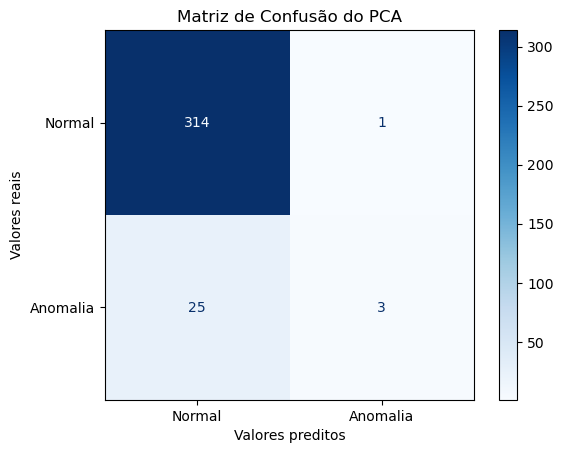

Avaliação do modelo PCA com Acurácia-fp:
Contaminação utilizada=0.03
Acurácia=92.71137026239067
Precisão=63.63636363636363
Recall=25.0
Falso Negativo=21
Falso Positivo=4



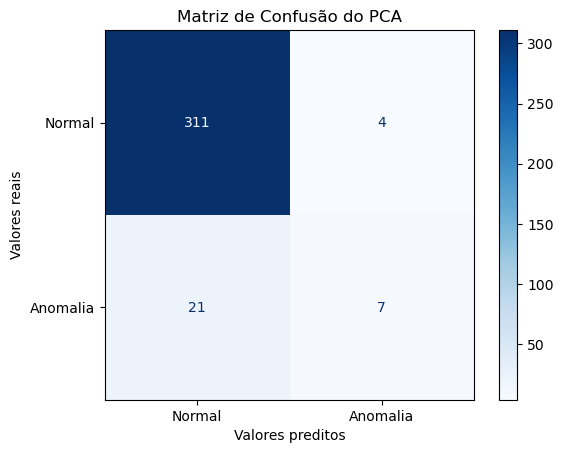

Avaliação do modelo PCA com Recall-Acurácia-fp:
Contaminação utilizada=0.15
Acurácia=83.09037900874635
Precisão=21.153846153846153
Recall=39.285714285714285
Falso Negativo=17
Falso Positivo=41



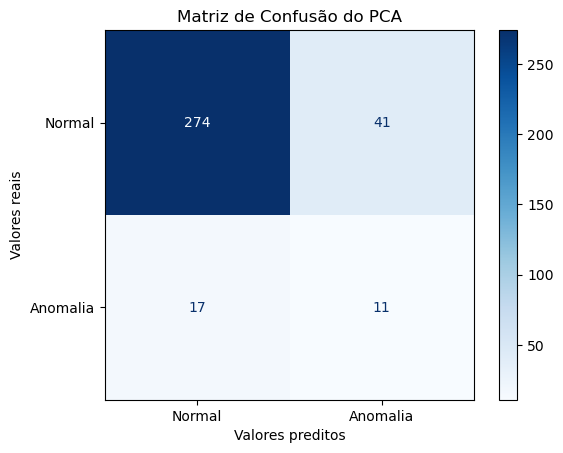

In [5]:
from pyod.models.pca import PCA
# Treinar algoritmo PCA para encontrar melhor contaminação
clf_name = 'PCA'
parametros='n_components=2,n_selected_components=2,'

#################################################################
# Calcula melhor contaminação primeiro com falso positivo depois acurárica
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com acurácia depois com falso positivo 
contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo OCSVM:
Contaminação utilizada=0.01
Acurácia=90.96209912536443
Precisão=0.0
Recall=0.0
Falso Negativo=28
Falso Positivo=3



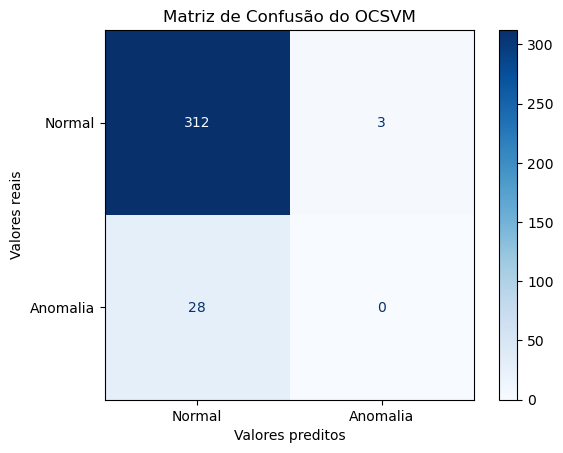

Avaliação do modelo OCSVM com Acurácia-fp:
Contaminação utilizada=0.01
Acurácia=90.96209912536443
Precisão=0.0
Recall=0.0
Falso Negativo=28
Falso Positivo=3



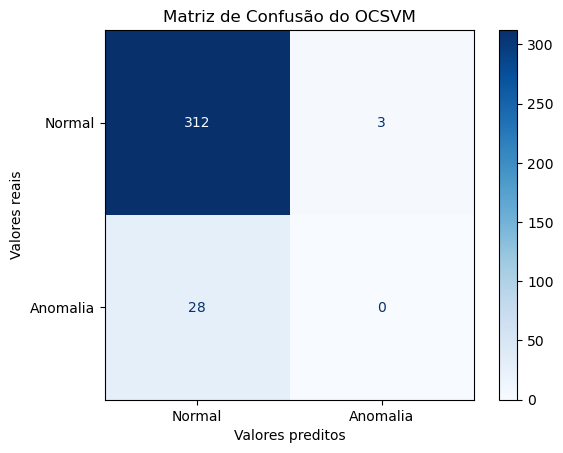

Avaliação do modelo OCSVM com Recall-Acurácia-fp:
Contaminação utilizada=0.15
Acurácia=79.59183673469387
Precisão=9.615384615384617
Recall=17.857142857142858
Falso Negativo=23
Falso Positivo=47



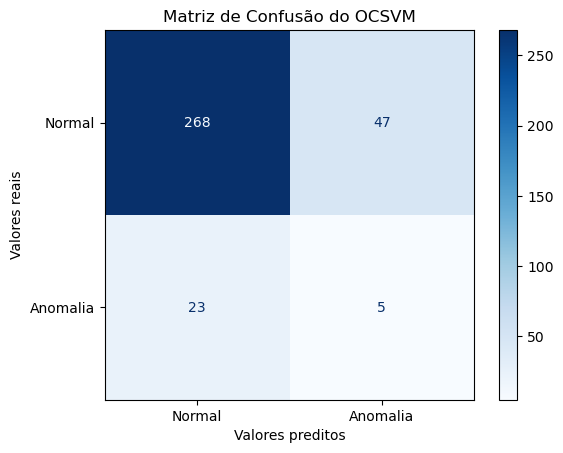

In [6]:
from pyod.models.ocsvm import OCSVM
# train OCSVM detector
clf_name = 'OCSVM'
parametros=''
contamination=calcula_anomalias(clf_name,'')

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

34
Avaliação do modelo LOF:
Contaminação utilizada=0.03
Acurácia=93.29446064139941
Precisão=72.72727272727273
Recall=28.57142857142857
Falso Negativo=20
Falso Positivo=3



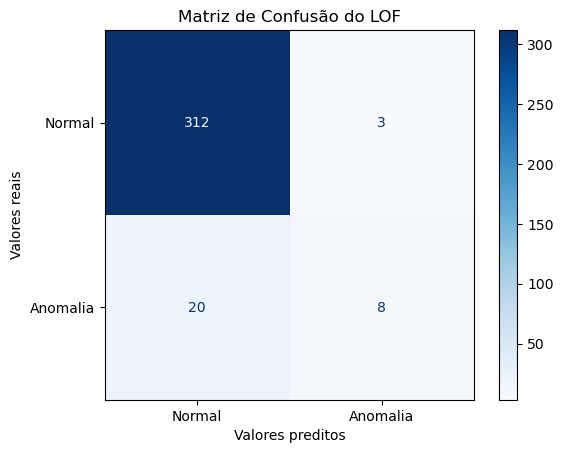

Avaliação do modelo LOF com Acurácia-fp:
Contaminação utilizada=0.05
Acurácia=94.16909620991254
Precisão=72.22222222222221
Recall=46.42857142857143
Falso Negativo=15
Falso Positivo=5



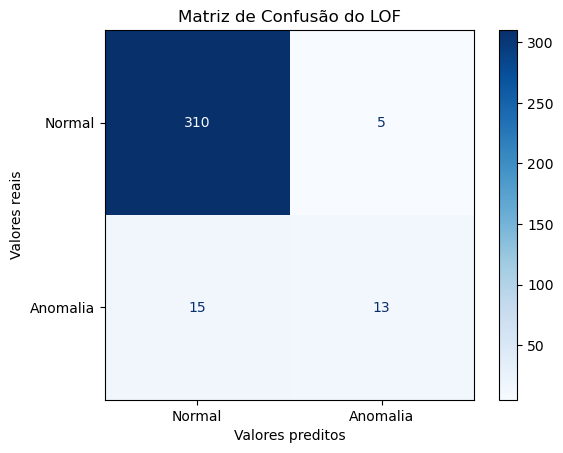

Avaliação do modelo LOF com Recall-Acurácia-fp:
Contaminação utilizada=0.10999999999999999
Acurácia=93.58600583090379
Precisão=57.89473684210527
Recall=78.57142857142857
Falso Negativo=6
Falso Positivo=16



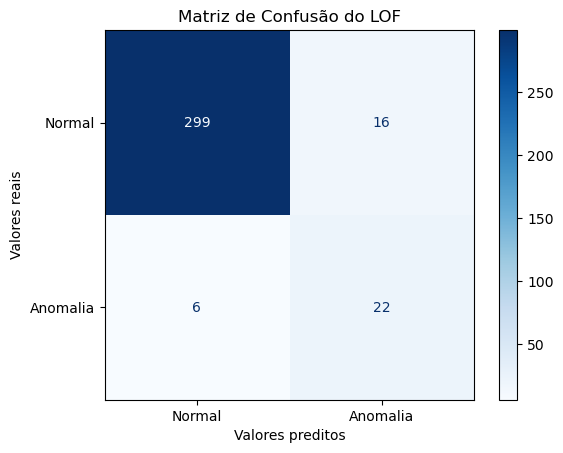

In [7]:
from pyod.models.lof import LOF
# train LOF detector
clf_name = 'LOF'
itens = len(X)/2
vizinhos=2
macuracia=0
nv=2
while vizinhos<itens: 
    clf = LOF(n_neighbors=vizinhos,contamination=contamination)
    clf.fit(X)
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)        
    ac=accuracy_score(Y,y_train_pred)
    if ac>macuracia:
        nv=vizinhos
        macuracia=ac
    vizinhos=vizinhos+1

print(nv)    

parametros='n_neighbors='+str(nv)+','
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo CBLOF:
Contaminação utilizada=0.01
Acurácia=91.25364431486881
Precisão=25.0
Recall=3.571428571428571
Falso Negativo=27
Falso Positivo=3



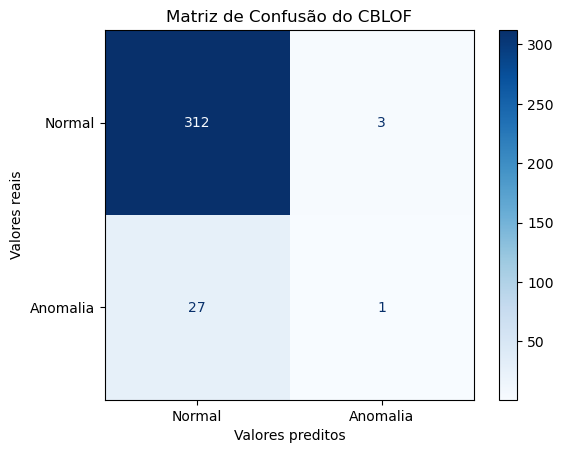

Avaliação do modelo CBLOF com Acurácia-fp:
Contaminação utilizada=0.01
Acurácia=91.25364431486881
Precisão=25.0
Recall=3.571428571428571
Falso Negativo=27
Falso Positivo=3



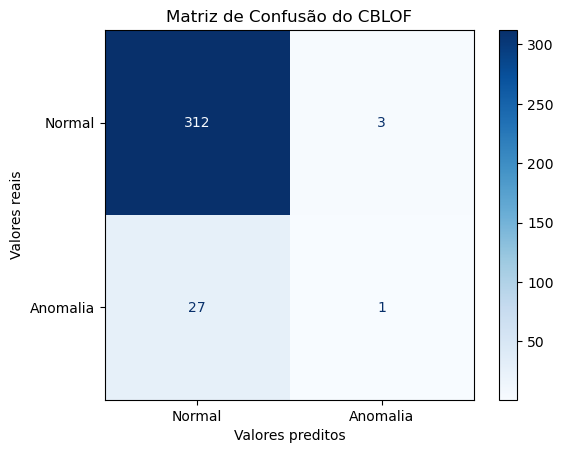

Avaliação do modelo CBLOF com Recall-Acurácia-fp:
Contaminação utilizada=0.02
Acurácia=90.37900874635568
Precisão=14.285714285714285
Recall=3.571428571428571
Falso Negativo=27
Falso Positivo=6



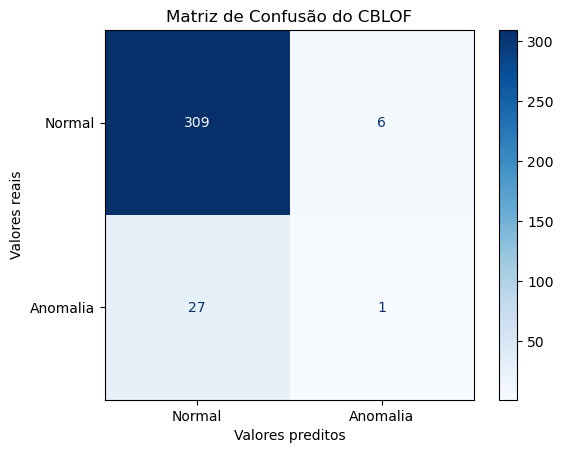

In [8]:
from pyod.models.cblof import CBLOF
# train CBLOF detector
clf_name = 'CBLOF' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo COF:
Contaminação utilizada=0.01
Acurácia=90.67055393586006
Precisão=0.0
Recall=0.0
Falso Negativo=28
Falso Positivo=4



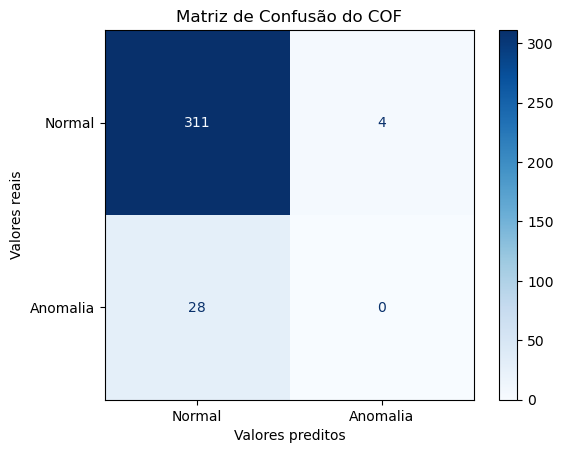

Avaliação do modelo COF com Acurácia-fp:
Contaminação utilizada=0.01
Acurácia=90.67055393586006
Precisão=0.0
Recall=0.0
Falso Negativo=28
Falso Positivo=4



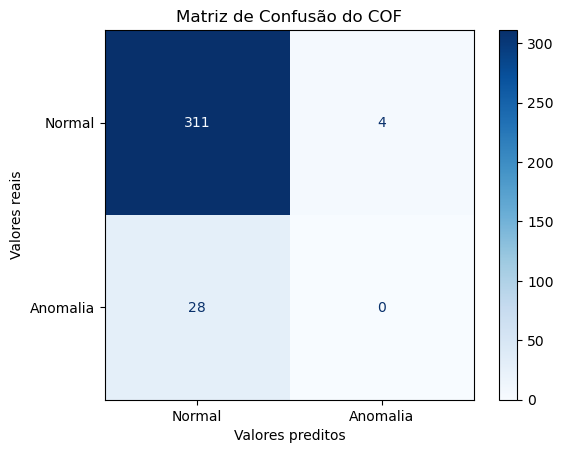

Avaliação do modelo COF com Recall-Acurácia-fp:
Contaminação utilizada=0.09999999999999999
Acurácia=82.79883381924198
Precisão=5.714285714285714
Recall=7.142857142857142
Falso Negativo=26
Falso Positivo=33



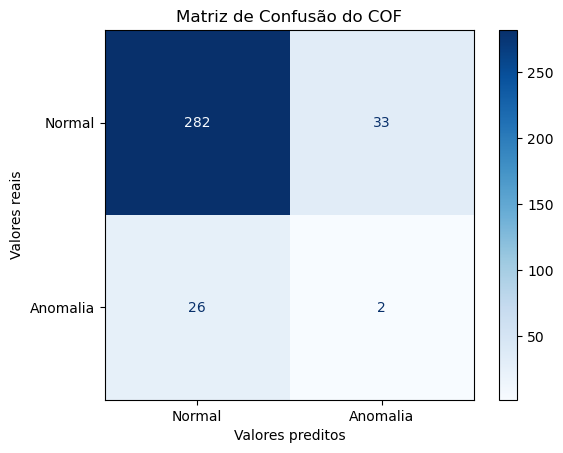

In [9]:
from pyod.models.cof import COF
# train COF detector
clf_name = 'COF' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo HBOS:
Contaminação utilizada=0.01
Acurácia=91.83673469387756
Precisão=50.0
Recall=7.142857142857142
Falso Negativo=26
Falso Positivo=2



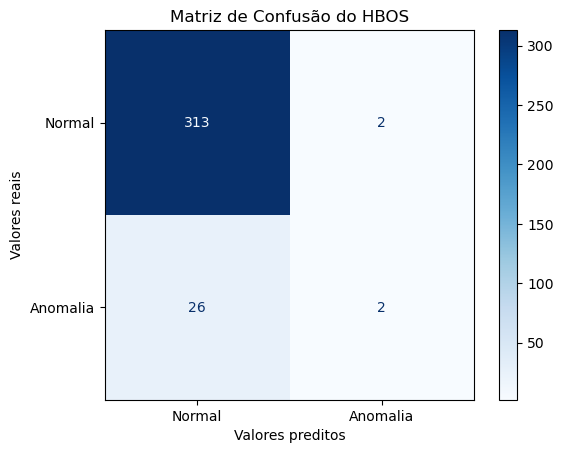

Avaliação do modelo HBOS com Acurácia-fp:
Contaminação utilizada=0.04
Acurácia=92.4198250728863
Precisão=57.14285714285714
Recall=28.57142857142857
Falso Negativo=20
Falso Positivo=6



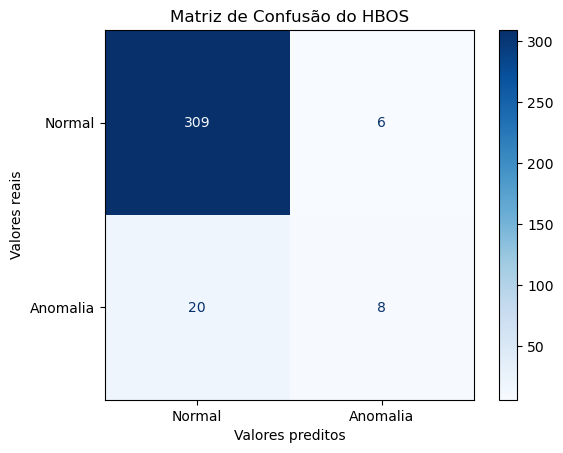

Avaliação do modelo HBOS com Recall-Acurácia-fp:
Contaminação utilizada=0.09
Acurácia=89.21282798833819
Precisão=35.483870967741936
Recall=39.285714285714285
Falso Negativo=17
Falso Positivo=20



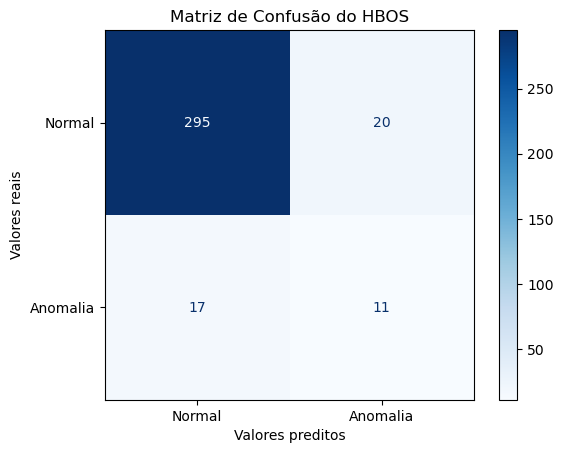

In [10]:
from pyod.models.hbos import HBOS

# train HBOS detector
clf_name = 'HBOS'
parametros='n_bins=35, alpha=contamination,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo KNN:
Contaminação utilizada=0.01
Acurácia=91.25364431486881
Precisão=25.0
Recall=3.571428571428571
Falso Negativo=27
Falso Positivo=3



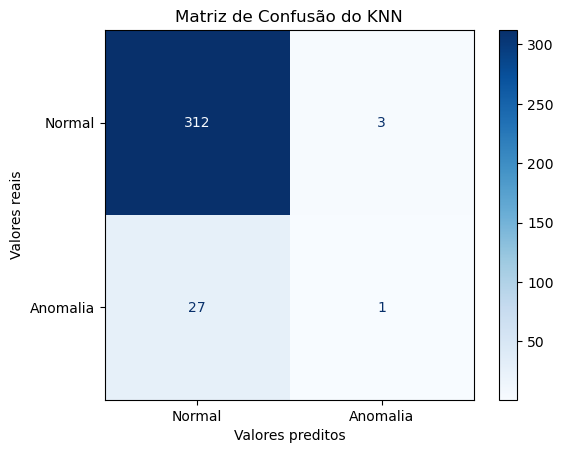

Avaliação do modelo KNN com Acurácia-fp:
Contaminação utilizada=0.01
Acurácia=91.25364431486881
Precisão=25.0
Recall=3.571428571428571
Falso Negativo=27
Falso Positivo=3



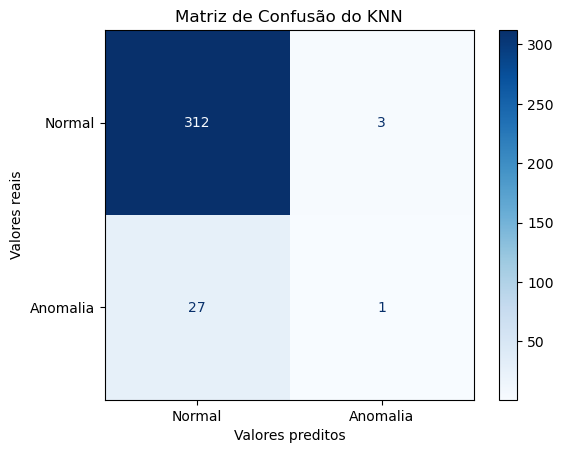

Avaliação do modelo KNN com Recall-Acurácia-fp:
Contaminação utilizada=0.02
Acurácia=90.96209912536443
Precisão=28.57142857142857
Recall=7.142857142857142
Falso Negativo=26
Falso Positivo=5



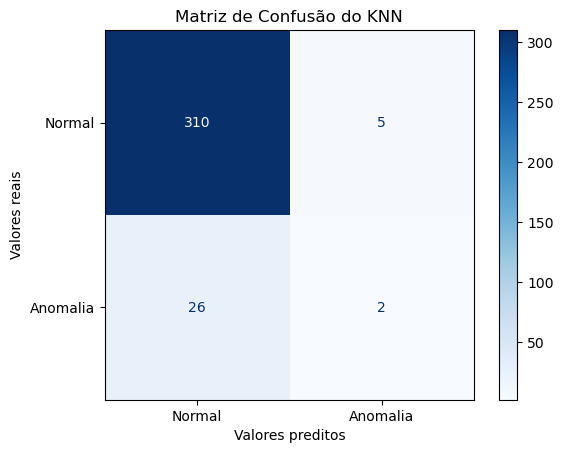

In [11]:
from pyod.models.knn import KNN
# train KNN detector
clf_name = 'KNN'
parametros='n_neighbors=35,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo SOD:
Contaminação utilizada=0.01
Acurácia=91.25364431486881
Precisão=25.0
Recall=3.571428571428571
Falso Negativo=27
Falso Positivo=3



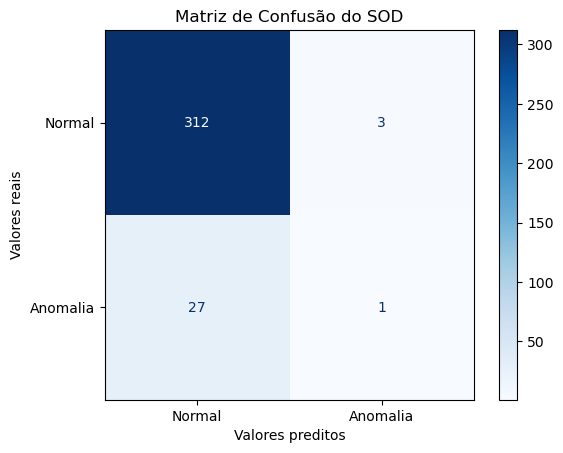

Avaliação do modelo SOD com Acurácia-fp:
Contaminação utilizada=0.01
Acurácia=91.25364431486881
Precisão=25.0
Recall=3.571428571428571
Falso Negativo=27
Falso Positivo=3



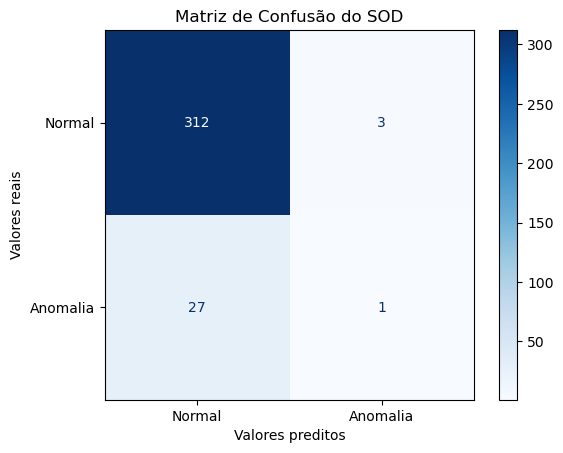

Avaliação do modelo SOD com Recall-Acurácia-fp:
Contaminação utilizada=0.10999999999999999
Acurácia=88.33819241982506
Precisão=34.21052631578947
Recall=46.42857142857143
Falso Negativo=15
Falso Positivo=25



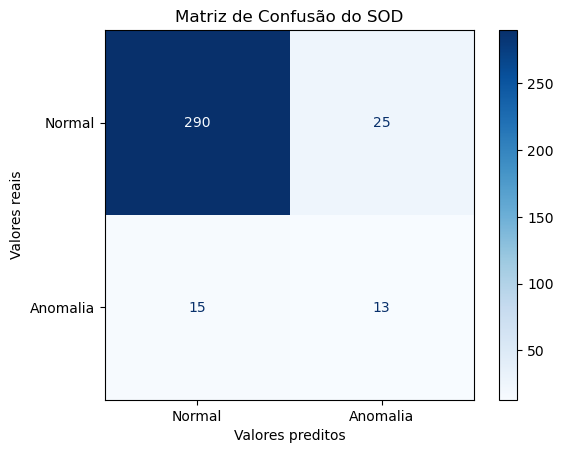

In [12]:
from pyod.models.sod import SOD
# train SOD detector
clf_name = 'SOD' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo COPOD:
Contaminação utilizada=0.01
Acurácia=93.00291545189503
Precisão=100.0
Recall=14.285714285714285
Falso Negativo=24
Falso Positivo=0



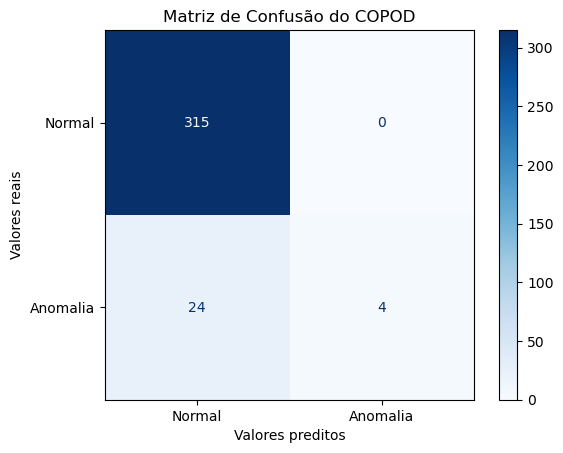

Avaliação do modelo COPOD com Acurácia-fp:
Contaminação utilizada=0.02
Acurácia=93.29446064139941
Precisão=85.71428571428571
Recall=21.428571428571427
Falso Negativo=22
Falso Positivo=1



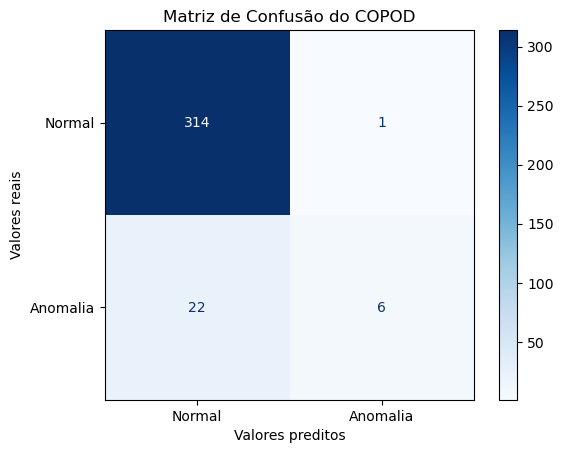

Avaliação do modelo COPOD com Recall-Acurácia-fp:
Contaminação utilizada=0.15
Acurácia=83.6734693877551
Precisão=23.076923076923077
Recall=42.857142857142854
Falso Negativo=16
Falso Positivo=40



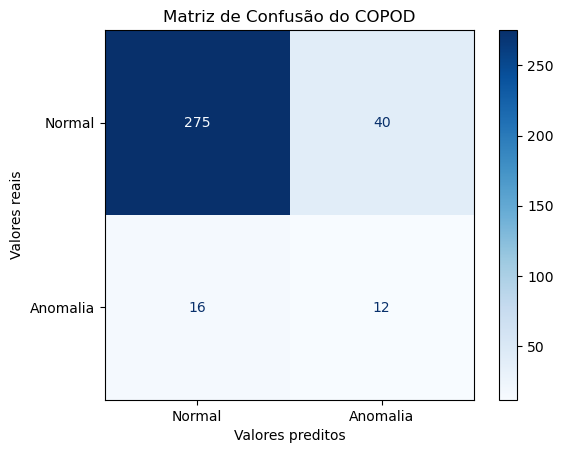

In [13]:
from pyod.models.copod import COPOD
# train COPOD detector
clf_name = 'COPOD'
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo ECOD:
Contaminação utilizada=0.02
Acurácia=93.87755102040816
Precisão=100.0
Recall=25.0
Falso Negativo=21
Falso Positivo=0



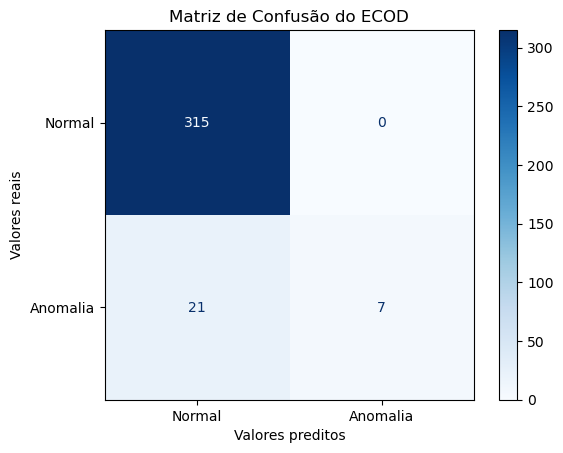

Avaliação do modelo ECOD com Acurácia-fp:
Contaminação utilizada=0.02
Acurácia=93.87755102040816
Precisão=100.0
Recall=25.0
Falso Negativo=21
Falso Positivo=0



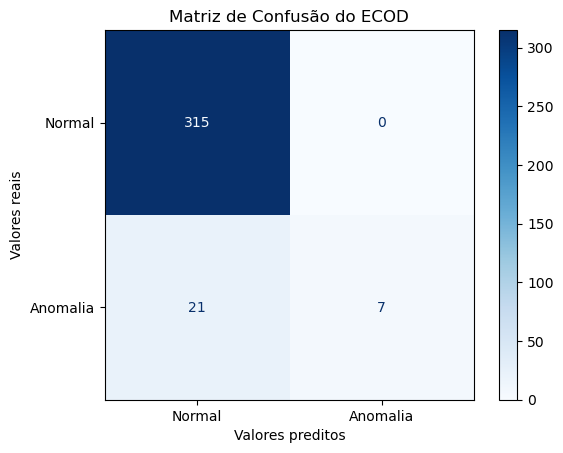

Avaliação do modelo ECOD com Recall-Acurácia-fp:
Contaminação utilizada=0.15
Acurácia=87.75510204081633
Precisão=36.53846153846153
Recall=67.85714285714286
Falso Negativo=9
Falso Positivo=33



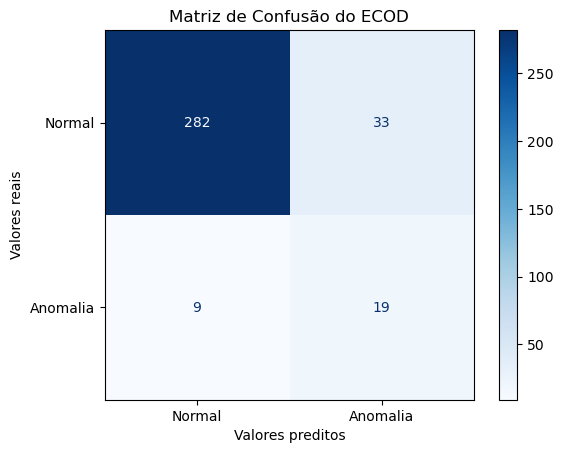

In [14]:
from pyod.models.ecod import ECOD
# train ECOD detector
clf_name = 'ECOD'
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo IForest:
Contaminação utilizada=0.01
Acurácia=92.4198250728863
Precisão=75.0
Recall=10.714285714285714
Falso Negativo=25
Falso Positivo=1



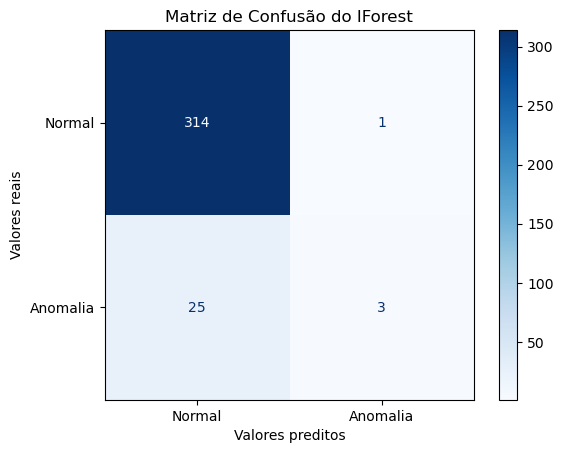

Avaliação do modelo IForest com Acurácia-fp:
Contaminação utilizada=0.01
Acurácia=92.4198250728863
Precisão=75.0
Recall=10.714285714285714
Falso Negativo=25
Falso Positivo=1



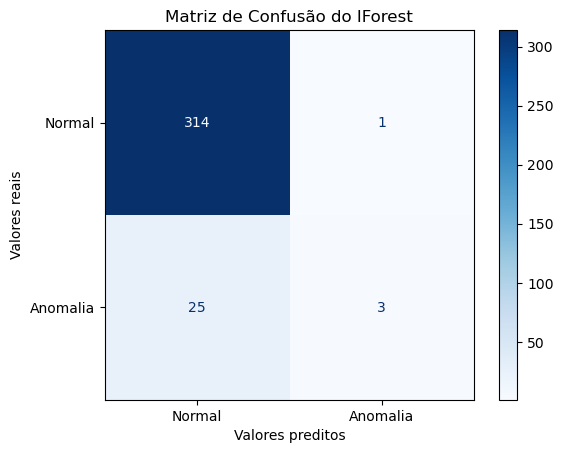

Avaliação do modelo IForest com Recall-Acurácia-fp:
Contaminação utilizada=0.09
Acurácia=86.88046647230321
Precisão=22.58064516129032
Recall=25.0
Falso Negativo=21
Falso Positivo=24



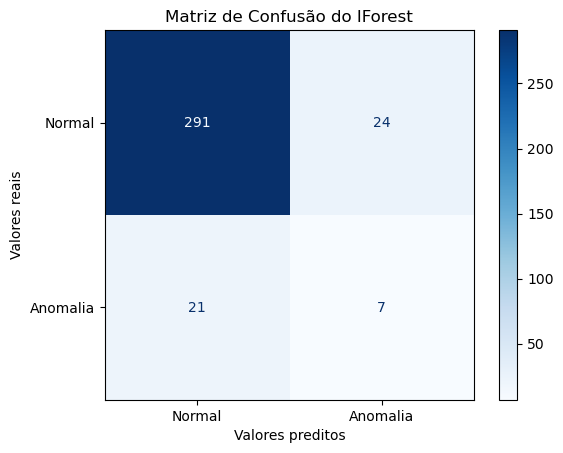

In [15]:
from pyod.models.iforest import IForest
# train IForest detector
clf_name = 'IForest'
itens = len(X)
estimadores = len(X)//10
if estimadores<2: estimadores=2

parametros='n_estimators=estimadores,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo LODA:
Contaminação utilizada=0.02
Acurácia=91.54518950437318
Precisão=42.857142857142854
Recall=10.714285714285714
Falso Negativo=25
Falso Positivo=4



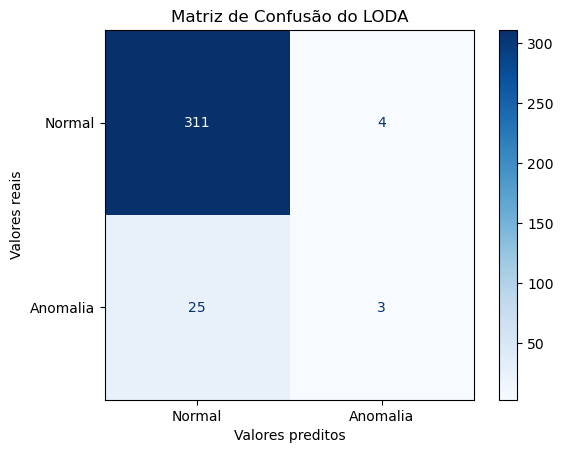

Avaliação do modelo LODA com Acurácia-fp:
Contaminação utilizada=0.01
Acurácia=91.83673469387756
Precisão=50.0
Recall=7.142857142857142
Falso Negativo=26
Falso Positivo=2



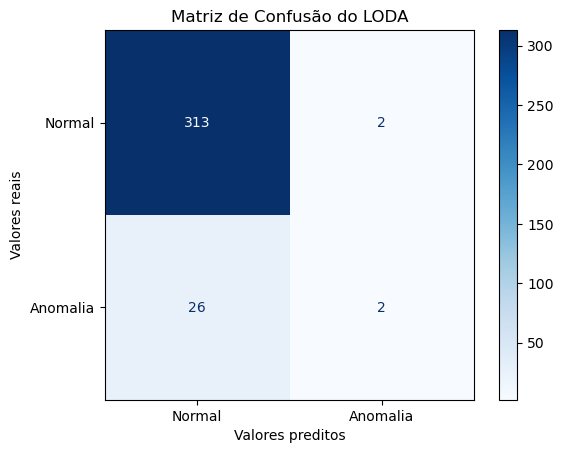

Avaliação do modelo LODA com Recall-Acurácia-fp:
Contaminação utilizada=0.07
Acurácia=89.79591836734694
Precisão=33.33333333333333
Recall=25.0
Falso Negativo=21
Falso Positivo=14



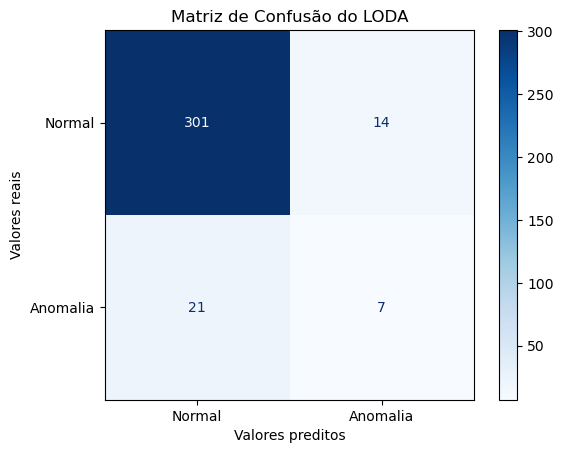

In [16]:
from pyod.models.loda import LODA
# train LODA detector
clf_name = 'LODA' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo DeepSVDD:
Contaminação utilizada=0.01
Acurácia=90.67055393586006
Precisão=0.0
Recall=0.0
Falso Negativo=28
Falso Positivo=4



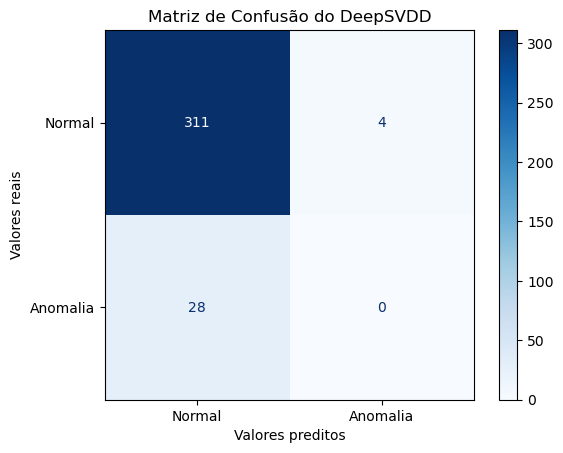

Avaliação do modelo DeepSVDD com Acurácia-fp:
Contaminação utilizada=0.01
Acurácia=90.67055393586006
Precisão=0.0
Recall=0.0
Falso Negativo=28
Falso Positivo=4



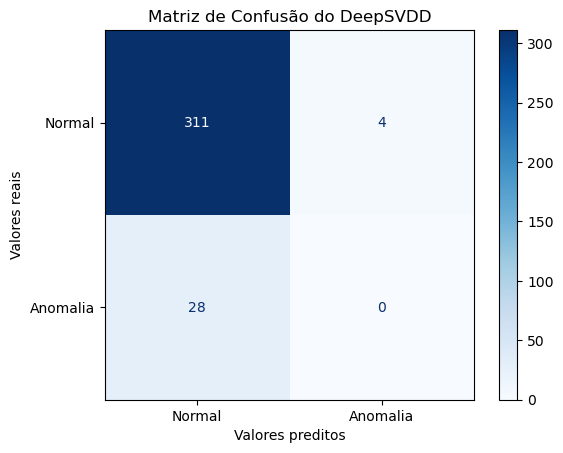

Avaliação do modelo DeepSVDD com Recall-Acurácia-fp:
Contaminação utilizada=0.08
Acurácia=84.25655976676384
Precisão=3.571428571428571
Recall=3.571428571428571
Falso Negativo=27
Falso Positivo=27



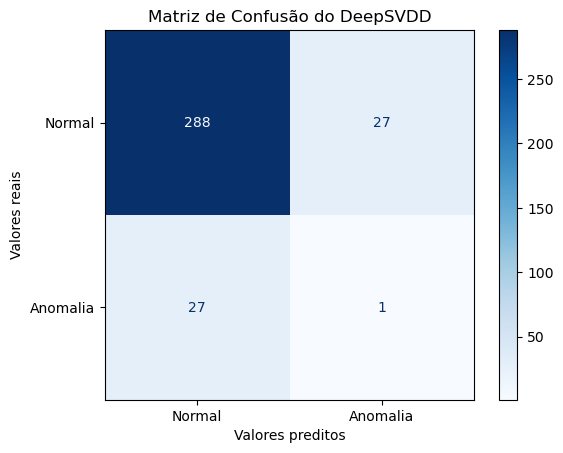

In [17]:
from pyod.models.deep_svdd import DeepSVDD
# train DeepSVDD detector
clf_name = 'DeepSVDD'
parametros='verbose=0,preprocessing=True,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo GMM:
Contaminação utilizada=0.01
Acurácia=91.25364431486881
Precisão=25.0
Recall=3.571428571428571
Falso Negativo=27
Falso Positivo=3



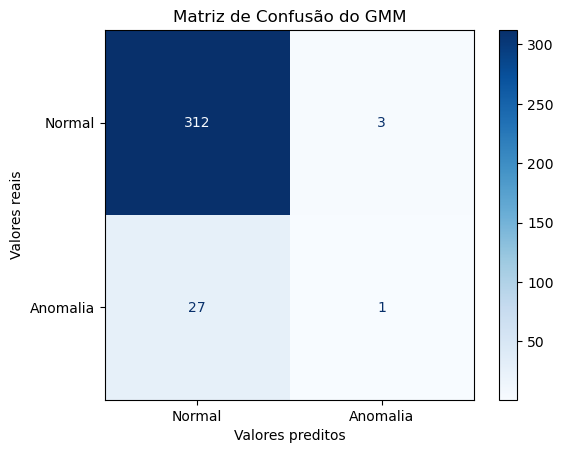

Avaliação do modelo GMM com Acurácia-fp:
Contaminação utilizada=0.02
Acurácia=91.54518950437318
Precisão=42.857142857142854
Recall=10.714285714285714
Falso Negativo=25
Falso Positivo=4



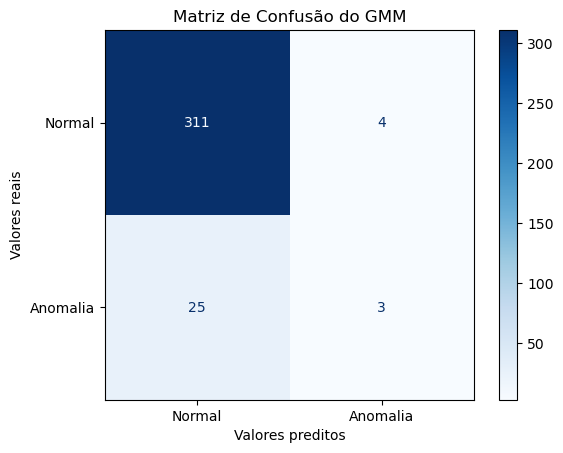

Avaliação do modelo GMM com Recall-Acurácia-fp:
Contaminação utilizada=0.09999999999999999
Acurácia=86.29737609329446
Precisão=22.857142857142858
Recall=28.57142857142857
Falso Negativo=20
Falso Positivo=27



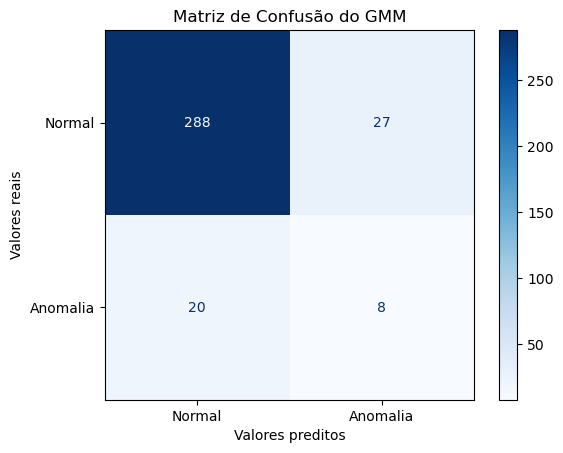

In [18]:
from pyod.models.gmm import GMM
# train GMM detector
clf_name = 'GMM' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

In [19]:
tabelafinal.sort_values("acuracia", axis = 0, ascending = False,
                 inplace = True, na_position ='last')
print(tabelafinal)

   algoritmo  contaminacao   acuracia    precisao     recall  fn  fp
9       ECOD          0.02  93.877551  100.000000  25.000000  21   0
2        LOF          0.03  93.294461   72.727273  28.571429  20   3
8      COPOD          0.01  93.002915  100.000000  14.285714  24   0
0        PCA          0.01  92.419825   75.000000  10.714286  25   1
10   IForest          0.01  92.419825   75.000000  10.714286  25   1
5       HBOS          0.01  91.836735   50.000000   7.142857  26   2
11      LODA          0.02  91.545190   42.857143  10.714286  25   4
3      CBLOF          0.01  91.253644   25.000000   3.571429  27   3
6        KNN          0.01  91.253644   25.000000   3.571429  27   3
7        SOD          0.01  91.253644   25.000000   3.571429  27   3
13       GMM          0.01  91.253644   25.000000   3.571429  27   3
1      OCSVM          0.01  90.962099    0.000000   0.000000  28   3
4        COF          0.01  90.670554    0.000000   0.000000  28   4
12  DeepSVDD          0.01  90.670

In [20]:
novatabelafinal.sort_values("acuracia", axis = 0, ascending = False,
                 inplace = True, na_position ='last')
print(novatabelafinal)

   algoritmo  contaminacao   acuracia    precisao     recall  fn  fp
3        LOF          0.05  94.169096   72.222222  46.428571  15   5
10      ECOD          0.02  93.877551  100.000000  25.000000  21   0
9      COPOD          0.02  93.294461   85.714286  21.428571  22   1
1        PCA          0.03  92.711370   63.636364  25.000000  21   4
6       HBOS          0.04  92.419825   57.142857  28.571429  20   6
11   IForest          0.01  92.419825   75.000000  10.714286  25   1
12      LODA          0.01  91.836735   50.000000   7.142857  26   2
14       GMM          0.02  91.545190   42.857143  10.714286  25   4
4      CBLOF          0.01  91.253644   25.000000   3.571429  27   3
7        KNN          0.01  91.253644   25.000000   3.571429  27   3
8        SOD          0.01  91.253644   25.000000   3.571429  27   3
2      OCSVM          0.01  90.962099    0.000000   0.000000  28   3
5        COF          0.01  90.670554    0.000000   0.000000  28   4
13  DeepSVDD          0.01  90.670

In [21]:
tabelafinalrecall.sort_values("acuracia", axis = 0, ascending = False,
                 inplace = True, na_position ='last')
print(tabelafinalrecall)

   algoritmo  contaminacao   acuracia   precisao     recall  fn  fp
3        LOF          0.11  93.586006  57.894737  78.571429   6  16
7        KNN          0.02  90.962099  28.571429   7.142857  26   5
4      CBLOF          0.02  90.379009  14.285714   3.571429  27   6
12      LODA          0.07  89.795918  33.333333  25.000000  21  14
6       HBOS          0.09  89.212828  35.483871  39.285714  17  20
8        SOD          0.11  88.338192  34.210526  46.428571  15  25
10      ECOD          0.15  87.755102  36.538462  67.857143   9  33
11   IForest          0.09  86.880466  22.580645  25.000000  21  24
14       GMM          0.10  86.297376  22.857143  28.571429  20  27
13  DeepSVDD          0.08  84.256560   3.571429   3.571429  27  27
9      COPOD          0.15  83.673469  23.076923  42.857143  16  40
1        PCA          0.15  83.090379  21.153846  39.285714  17  41
5        COF          0.10  82.798834   5.714286   7.142857  26  33
2      OCSVM          0.15  79.591837   9.615385